In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importing the data

In [65]:
filename="./train.csv"
df=pd.read_csv(filename)
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Exploratory data analysis 

In [66]:
#checking the missing data 
df.describe(include='all')
df.isnull().sum()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Boulos, Mr. Hanna",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
#checking the unstandard missing values
missing_values=['??','na','X','999999']
# df=df.replace(missing_values,np.NaN)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:

# Replacing missing values for continues variables 
numericFeaturesWithNull=['Age']
# first lets check the dtyprs
df.dtypes
# if 'age is not numeric we have to change to numeric
df[numericFeaturesWithNull]=df[numericFeaturesWithNull].astype("float64")

# calculating the mean
m=round(df[numericFeaturesWithNull].mean(),2)[0]

# replacing with mean
df['Age'].fillna(m,inplace=True)

df.isnull().sum()


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [75]:

# Replacing missing values for categorical variables 
categoricalFeaturesWithNull=['Cabin','Embarked']

for col in categoricalFeaturesWithNull:
    # calculating the mode for the categorical variable
    m=df[col].mode()[0]

    # replacing with mode
    df[col].fillna(m,inplace=True)

df.isnull().sum()
df.dropna(inplace=True)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [76]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [117]:
# creating the clean data of all features and output
featureList=['Sex','Age','Fare','Embarked']
dependantList=['Survived']
X_df=df[featureList]
Y_df=df[dependantList]
X_df.columns
Y_df.columns

Index(['Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

Index(['Survived'], dtype='object')

Text(0.5, 1.0, 'Outlier Box Plot')

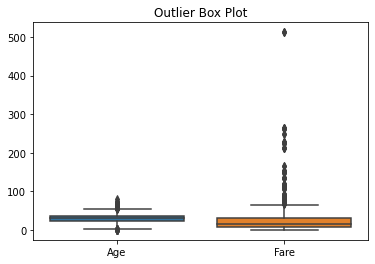

In [118]:
# checking the outliers and dealing with them
sns.boxplot(data= X_df).set_title("Outlier Box Plot")


### Encoding categorical data

In [135]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
categoricalFeatures=['Sex','Embarked']
X_df[categoricalFeatures].describe()
X_df.head()
labelencoder = LabelEncoder()
X_df.iloc[:,0]=labelencoder.fit_transform(X_df.iloc[:, 0]) # binary categorical (sex)
X_df.iloc[:, 3] = labelencoder.fit_transform(X_df.iloc[:, 3])  # this is multi class and after label encoder needs one hot
onehotencoder = OneHotEncoder()
ct=ColumnTransformer([('TR',onehotencoder,[3])],remainder='passthrough') # this will one hot encode the specified column and then add the resulted columsn to the begining of the array
X= ct.fit_transform(X_df)
Y=Y_df.values.reshape(1,-1)

,Sex,Embarked
count,891.000000,891.000000
mean,0.647587,1.536476
std,0.477990,0.791503
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,1.000000,2.000000
max,1.000000,2.000000


,Sex,Age,Fare,Embarked
0,1,22.0,7.2500,2
1,0,38.0,71.2833,0
2,0,26.0,7.9250,2
3,0,35.0,53.1000,2
4,1,35.0,8.0500,2


In [137]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

transformer= = MaxAbsScaler()
# transformer = StandardScaler()
X[:,[1,2]] = transformer.fit_transform(X[:,[1,2]]) 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [134]:
X[:,:10]

array([[ 0.        , -0.30756234,  0.61583843,  1.        , 22.        ,
         7.25      ],
       [ 1.        , -0.30756234, -1.62380254,  0.        , 38.        ,
        71.2833    ],
       [ 0.        , -0.30756234,  0.61583843,  0.        , 26.        ,
         7.925     ],
       ...,
       [ 0.        , -0.30756234,  0.61583843,  0.        , 29.7       ,
        23.45      ],
       [ 1.        , -0.30756234, -1.62380254,  1.        , 26.        ,
        30.        ],
       [ 0.        ,  3.25137334, -1.62380254,  1.        , 32.        ,
         7.75      ]])

In [125]:
### Split train test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [129]:

#training and testing the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
random=clf.fit(X_train,y_train)

y_pred =random.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(random,X_test,y_test).mean())




ground truth           : [[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
predicted class        : [1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0